In [4]:
%%javascript
// IPython.OutputArea.auto_scroll_threshold = 1;

<IPython.core.display.Javascript object>

In [5]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from __future__ import division, absolute_import, print_function
import sys
sys.path.append('/home/mkurnikov/_python/hazard')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import FeatureUnion

from src.main import get_whole_dataset
import src.feature_sets as feature_sets

import settings

In [8]:
union = FeatureUnion([
         feature_sets.DIRECT,
    ])

In [9]:
orig_dataset = get_whole_dataset()
orig_dataset.head(5)

,Id,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,15,3,2,N,B,N,B,B,D,...,2,37,1,11,6,Y,N,E,2,2
1,2,16,14,5,H,B,N,B,B,C,...,2,22,1,18,5,Y,Y,E,2,1
2,3,10,10,5,N,K,N,B,B,E,...,6,37,2,14,6,Y,Y,E,6,1
3,4,18,18,5,N,K,N,B,B,E,...,2,25,1,1,6,Y,N,C,2,6
4,5,13,19,5,N,H,N,B,B,E,...,1,22,1,2,7,N,N,E,1,1


In [21]:
from kaggle_tools.feature_extraction import FeatureColumnsExtractor
orig_dataset = get_whole_dataset()
# sample_mask = np.zeros((orig_dataset.shape[0],), dtype=np.bool_)
# sample_idx = sample_without_replacement(orig_dataset.shape[0], orig_dataset.shape[0] * 1.0, random_state=42)
# sample_mask[sample_idx] = True

# before = time.time()
fcols = [col for col in orig_dataset.columns if col in settings.FEATURES]
catconversion = FeatureUnion([
    feature_sets.CATEGORICAL_CONVERSION
], n_jobs=1)

dataset = pd.DataFrame(data=catconversion.fit_transform(orig_dataset),
                       columns=fcols, index=orig_dataset.index)
# target = FeatureColumnsExtractor(settings.TARGET).fit_transform(orig_dataset).apply(nonlinearity)

cols = list(dataset.columns)
# cols.remove('Id')
# print(cols)
data = union.fit_transform(dataset, np.empty((dataset.shape[0],)))

dataset = pd.DataFrame(data=data, columns=cols, index=orig_dataset.index)
dataset.head(5)

,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,15,3,2,5,1,0,1,1,2,7,...,2,37,1,11,6,1,0,4,2,2
1,16,14,5,4,1,0,1,1,1,12,...,2,22,1,18,5,1,1,4,2,1
2,10,10,5,5,8,0,1,1,3,12,...,6,37,2,14,6,1,1,4,6,1
3,18,18,5,5,8,0,1,1,3,3,...,2,25,1,1,6,1,0,2,2,6
4,13,19,5,5,5,0,1,1,3,7,...,1,22,1,2,7,0,0,4,1,1


In [22]:
def feature_hist(dataset, feature_name, ax, title='', *args, **kwargs):
    ser = dataset[feature_name]
    unique_ser = ser.unique()
    unique_ser.sort()
#     print(unique_ser)

    counts = ser.value_counts().reindex(unique_ser)
    sns.barplot(unique_ser, counts, ax=ax)
#     ax.text(0.5, 0.9, title, 
#             horizontalalignment='center',
#             transform=ax.transAxes)
    ax.set_title(title)
    ax.set(*args, **kwargs)
#     ax.set_title(feature_name)
    
# ax1 = plt.gca()
# feature_hist(orig_dataset, 'T1_V8', ax=ax1)

['T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6', 'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13', 'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3', 'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10', 'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15']


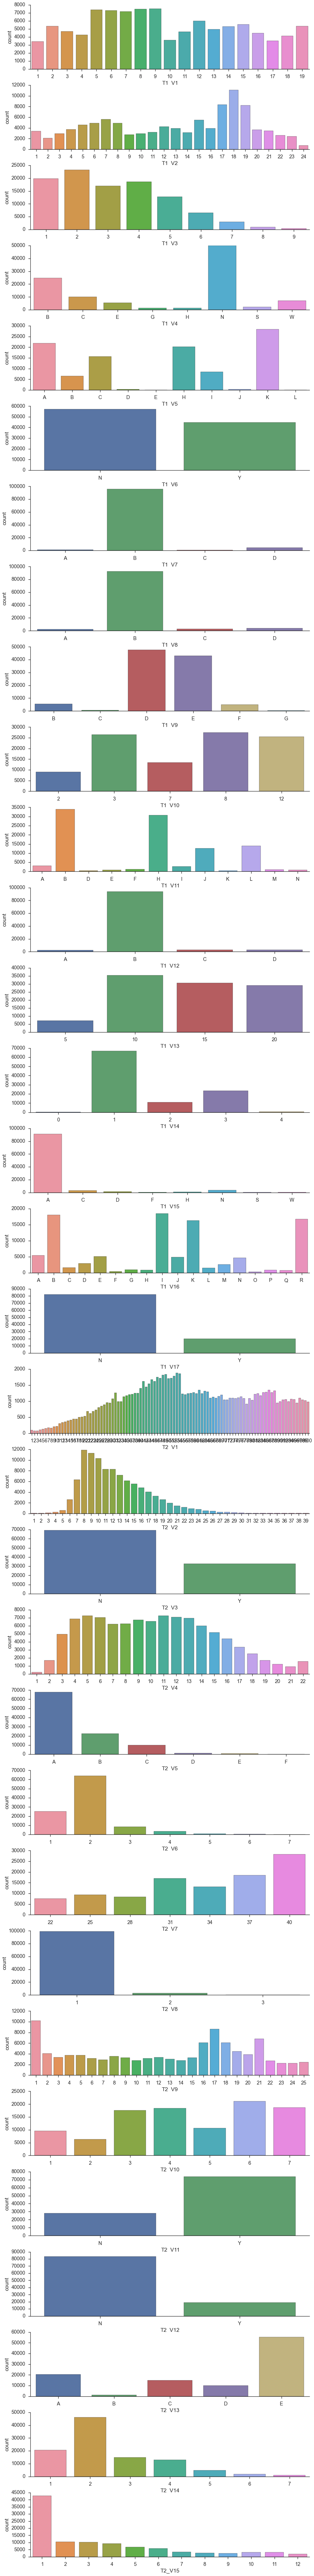

In [23]:
sns.set()
# sns.set_style('whitegrid')
sns.set_style('ticks')
sns.set_context('talk', font_scale=1.1, 
               rc={"lines.linewidth": 2.5})
# plt.figure()
cols = list(orig_dataset.columns)
cols.remove('Id')

# cols = [u'T1_V2', u'T1_V3']
# cols = cols[:10]
print(cols)
fig, axes = plt.subplots(len(cols), 1, figsize=(12, 3.2 * len(cols)))
# fig, (ax1, ax2) = plt.subplots(2, 1)
fig.tight_layout()
sns.despine()

import time

# col1, col2 = orig_dataset.columns[1:3]
for i, col in enumerate(cols):
#     print(col)
#     feature_hist(orig_dataset, col, ax=axes[i], title=col)
    sns.countplot(x=col, data=orig_dataset, ax=axes[i], 
                 order=sorted(orig_dataset[col].unique()))
    time.sleep(0.1)
# feature_hist(orig_dataset, col2, ax=ax2)
# sns.distplot(dataset['T1_V1'], kde=False, ax=ax1)
# sns.distplot(dataset['T1_V2'], kde=False, ax=ax2)

In [24]:
corr_matrix = dataset.corr()
corr_matrix

,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
T1_V1,1.000000,0.004254,-0.031598,0.227495,0.087972,-0.001999,0.006785,0.014953,0.072629,0.002010,...,0.003823,0.002720,0.032195,-0.184709,0.000156,-0.151987,0.004663,-0.203887,0.016522,0.003803
T1_V2,0.004254,1.000000,0.128450,0.015459,0.057385,0.001527,0.004617,0.006427,0.056998,-0.005440,...,-0.000525,0.001343,0.030037,0.016062,-0.004770,0.024604,-0.004115,0.018101,-0.037916,0.155802
T1_V3,-0.031598,0.128450,1.000000,0.037565,0.033276,0.003300,0.002628,0.009608,0.010952,0.000491,...,0.032346,0.000474,0.018381,0.005521,-0.004088,-0.002611,0.011074,-0.023676,0.023930,0.092959
T1_V4,0.227495,0.015459,0.037565,1.000000,0.091708,-0.003919,0.003726,0.023346,0.041707,-0.002876,...,0.026002,0.005398,0.056380,-0.078652,-0.001778,-0.062955,-0.026831,-0.089115,0.032598,-0.009057
T1_V5,0.087972,0.057385,0.033276,0.091708,1.000000,-0.000028,-0.000224,0.009119,0.689726,0.003098,...,0.028368,-0.004221,0.022605,-0.018781,-0.000540,0.002833,0.050589,-0.014051,0.019376,0.124978
T1_V6,-0.001999,0.001527,0.003300,-0.003919,-0.000028,1.000000,-0.003053,0.000219,0.000905,0.001170,...,0.003175,0.005040,-0.000483,0.000271,-0.003471,-0.006822,-0.008922,-0.006360,0.002268,0.001373
T1_V7,0.006785,0.004617,0.002628,0.003726,-0.000224,-0.003053,1.000000,0.006334,0.001444,-0.005032,...,0.007763,0.001736,0.002205,-0.003634,0.002323,-0.003607,-0.003067,0.001876,0.002963,0.001766
T1_V8,0.014953,0.006427,0.009608,0.023346,0.009119,0.000219,0.006334,1.000000,-0.000958,0.004169,...,0.000905,0.002587,-0.006385,0.001027,0.000857,-0.006100,-0.023429,-0.016508,-0.000856,0.017460
T1_V9,0.072629,0.056998,0.010952,0.041707,0.689726,0.000905,0.001444,-0.000958,1.000000,0.002712,...,-0.002728,-0.004385,0.021665,-0.049549,0.003274,-0.007901,0.057730,-0.002086,-0.012833,0.071750
T1_V10,0.002010,-0.005440,0.000491,-0.002876,0.003098,0.001170,-0.005032,0.004169,0.002712,1.000000,...,0.004350,0.005510,0.000219,-0.001666,0.003788,0.003012,0.001044,0.001113,0.006354,0.001735


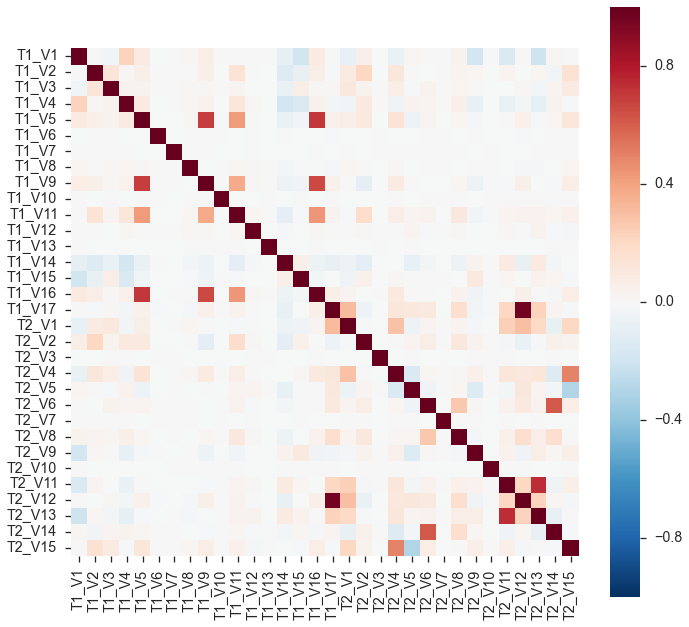

In [25]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(corr_matrix, vmax=1.0, square=True)

# networks = corr_matrix.columns.get_level_values('network')
# for i, network in enumerate(networks):
#     if i and network != networks[i - 1]:
#         ax.axhline(len(networks) - i, c="w")
#         ax.axvline(i, c="w")
fig.tight_layout()

In [26]:
corr_col = corr_matrix['T1_V17'].copy()
corr_col.drop('T2_V12', axis=0, inplace=True)
corr_col.drop('T1_V17', axis=0, inplace=True)
T1_V17_max_corr = corr_col.abs().max()

corr_col = corr_matrix['T2_V12'].copy()
corr_col.drop('T2_V12', axis=0, inplace=True)
corr_col.drop('T1_V17', axis=0, inplace=True)
T2_V12_max_corr = corr_col.abs().max()

Max corrcoeff against other variables: 
	 T1_V17 - 0.318375330733 
	 T2_V12 - 0.30461597282
Conclusion: drop T1_V17 variable.


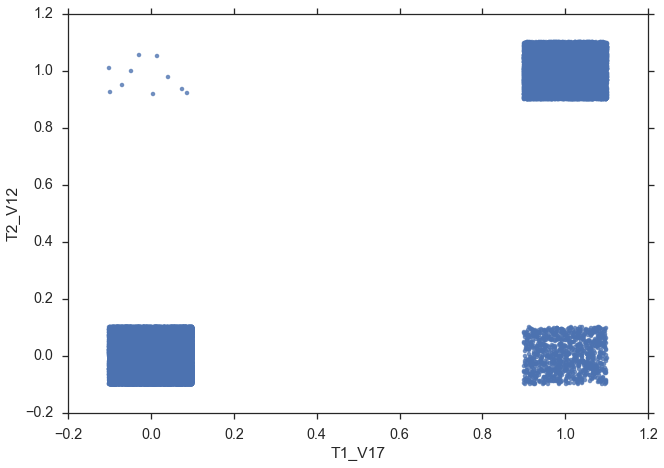

In [27]:
'T1_V17', 'T2_V12'
fig, ax = plt.subplots(1, 1)
sns.regplot(dataset['T1_V17'], dataset['T2_V12'], scatter=True, fit_reg=False, ax=ax, 
            x_jitter=0.1, y_jitter=0.1)

print('Max corrcoeff against other variables: \n\t',
      'T1_V17 -', T1_V17_max_corr, '\n\t', 
      'T2_V12 -', T2_V12_max_corr)
print('Conclusion: drop T1_V17 variable.')

In [31]:
import settings

dataset_train = pd.read_csv(settings.TRAIN_FILE)
target = FeatureColumnsExtractor(settings.TARGET).fit_transform(dataset_train)

dataset_train = pd.DataFrame(data=catconversion.fit_transform(dataset_train),
                       columns=fcols, index=dataset_train.index)


cols = list(dataset_train.columns)
# cols.remove('Id')
# cols.remove('Hazard')
# print(cols)
data = union.fit_transform(dataset_train, target)
# print(data.shape)
# print(len(cols))

dataset_train = pd.DataFrame(data=data, columns=cols, index=dataset_train.index)
dataset_train.head(5)

,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,T1_V9,T1_V10,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,15,3,2,5,1,0,1,1,2,7,...,2,37,1,11,6,1,0,4,2,2
1,16,14,5,4,1,0,1,1,1,12,...,2,22,1,18,5,1,1,4,2,1
2,10,10,5,5,8,0,1,1,3,12,...,6,37,2,14,6,1,1,4,6,1
3,18,18,5,5,8,0,1,1,3,3,...,2,25,1,1,6,1,0,2,2,6
4,13,19,5,5,5,0,1,1,3,7,...,1,22,1,2,7,0,0,4,1,1


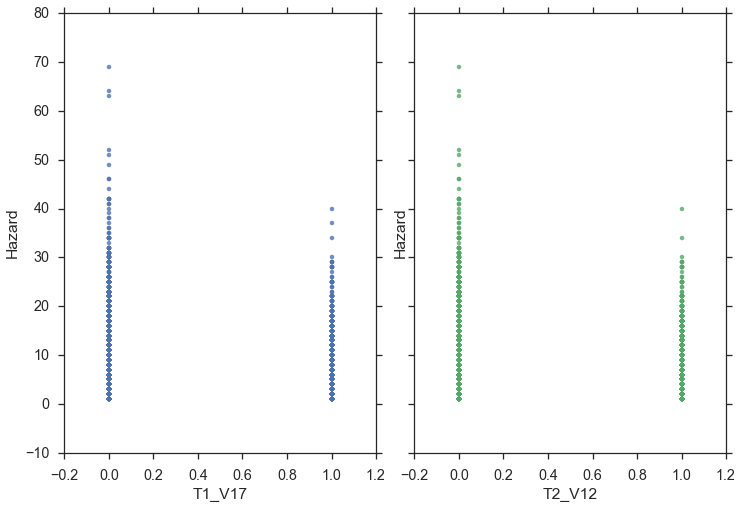

In [32]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
sns.regplot(dataset_train['T1_V17'], target, scatter=True, fit_reg=False, ax=ax1)
sns.regplot(dataset_train['T2_V12'], target, scatter=True, fit_reg=False, ax=ax2)
fig.tight_layout()

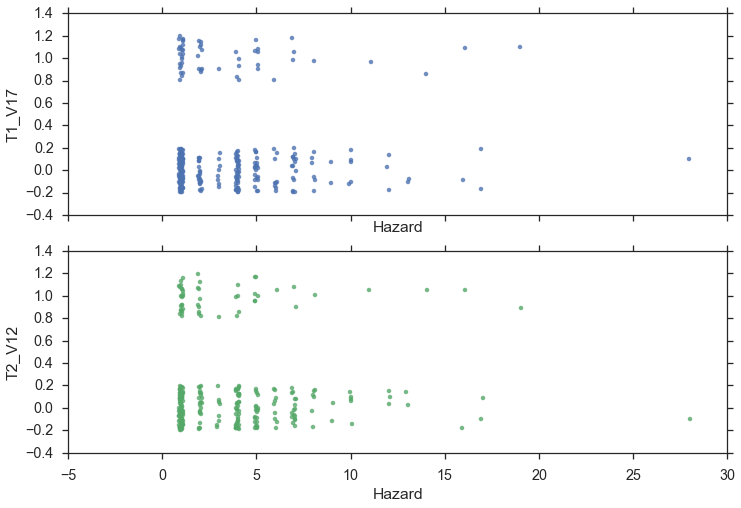

In [33]:
import random
rows = random.sample(dataset_train.index, 300)
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
sns.regplot(target.ix[rows], dataset_train.ix[rows]['T1_V17'], scatter=True, fit_reg=False, ax=ax1, 
            y_jitter=0.2, x_jitter=0.1)
sns.regplot(target.ix[rows], dataset_train.ix[rows]['T2_V12'], scatter=True, fit_reg=False, ax=ax2, 
            y_jitter=0.2, x_jitter=0.1)
fig.tight_layout()

In [34]:
print('Correlation with the response: ')
print('\tT1_V17 - ', np.corrcoef(dataset_train['T1_V17'], target)[0, 1])
print('\tT2_V12 - ', np.corrcoef(dataset_train['T2_V12'], target)[0, 1])

Correlation with the response: 
	T1_V17 -  -0.0106451606646
	T2_V12 -  -0.00957141763155


## Correlation with the response

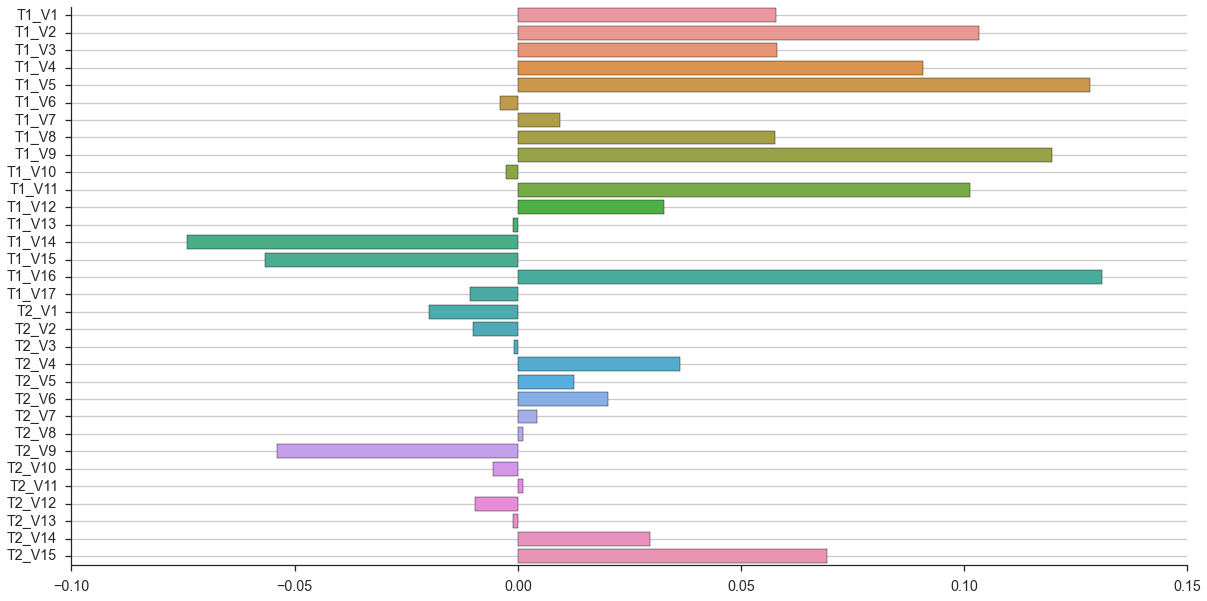

In [35]:
# np.corrcoef([dataset_train['T1_V17'], dataset_train['T2_V12']], target)

features = cols
data_cols = [dataset_train[f] for f in features]
response_corr = np.corrcoef(data_cols, target)[-1, :][:-1]

fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(response_corr, features, ax=ax, orient='h')

# ax.set_xticklabels(features, rotation=-30)
ax.yaxis.grid(True)
# sns.set_style('whitegrid')
sns.set_style('ticks')
sns.despine()
# ax.set_xticks(position='vertical')

In [36]:
'Variables dropped from dataset in Scripts version of xgboost'
scripts_dropped_features = ['T1_V10', 'T1_V13', 'T2_V7', 'T2_V10']
print(scripts_dropped_features)

['T1_V10', 'T1_V13', 'T2_V7', 'T2_V10']


0 T1_V10
1 T1_V13
2 T2_V7
3 T2_V10


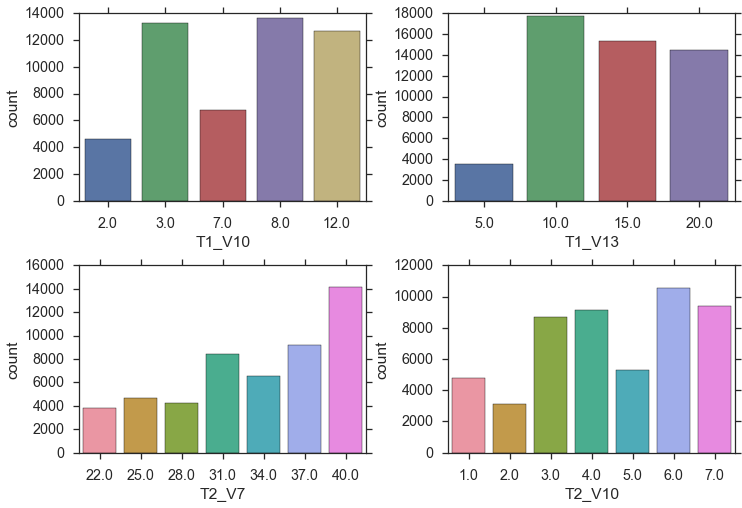

In [37]:
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
for i, feature in enumerate(scripts_dropped_features):
    print(i, feature)
#     print(ax)
    ax = axes[i]
    sns.countplot(x=feature, data=dataset_train, ax=ax, 
                 order=sorted(dataset_train[feature].unique()))
plt.tight_layout()

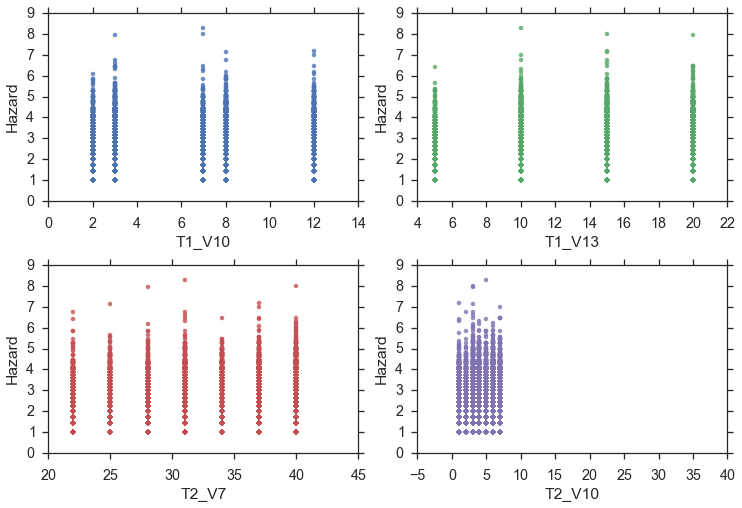

In [38]:
target_ = target ** (0.5)
fig, axes = plt.subplots(2, 2)
axes = axes.flatten()
for i, feature in enumerate(scripts_dropped_features):
#     print(i, feature)
#     print(ax)
    ax = axes[i]
    sns.regplot(feature, target_, data=dataset_train, ax=ax, fit_reg=False)
plt.tight_layout()

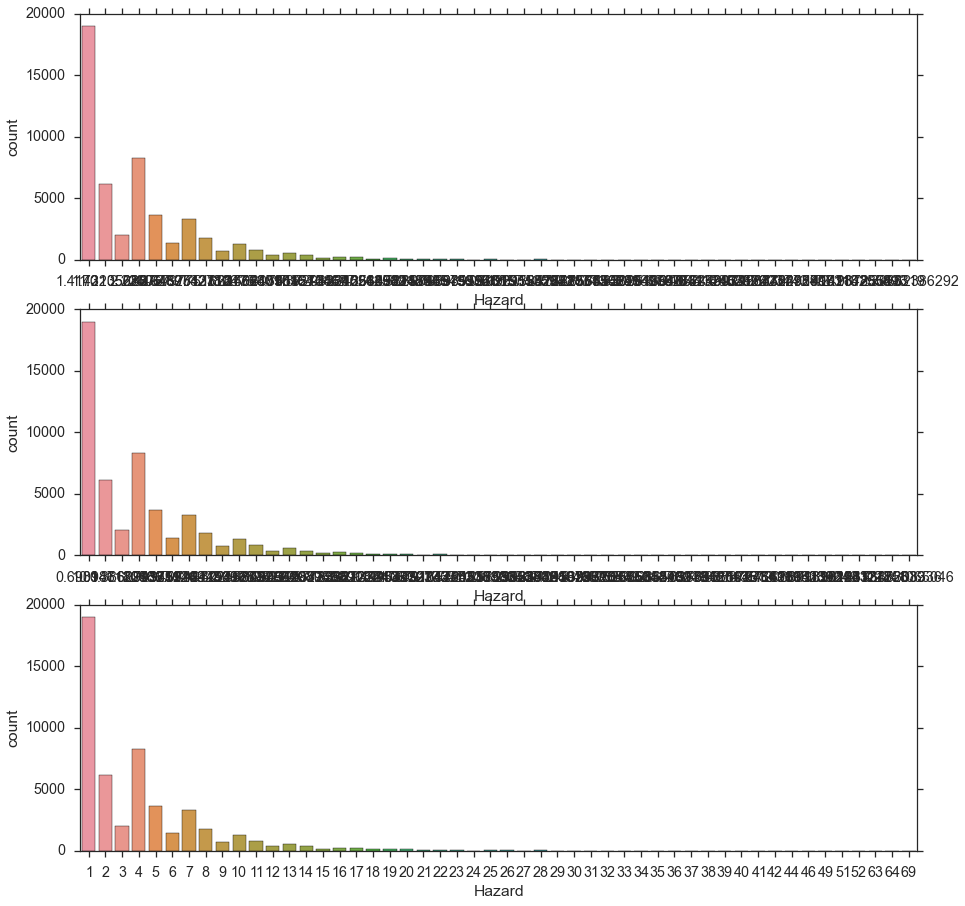

In [39]:
fix, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(15, 15))
target_sqrt = np.sqrt(target)
sns.countplot(target_sqrt, ax=ax1, 
             order=sorted(target_sqrt.unique()))
target_log = np.log(target)
sns.countplot(target_log, ax=ax2, 
             order=sorted(target_log.unique()))
# target_sqrt = np.sqrt(target)
sns.countplot(target, ax=ax3, 
             order=sorted(target.unique()))
# sns.countplot(np.log(target), ax=ax2)
# sns.countplot(np.log(target), ax=ax3)

[ 1  4  5  7 15 14  8 16  6 11  3 13  2 18 10 17 22  9 21 20 12 19 37 23 28
 27 31 38 41 26 33 29 30 25 24 36 51 42 34 46 32 69 40 35 44 39 49 52 63 64]


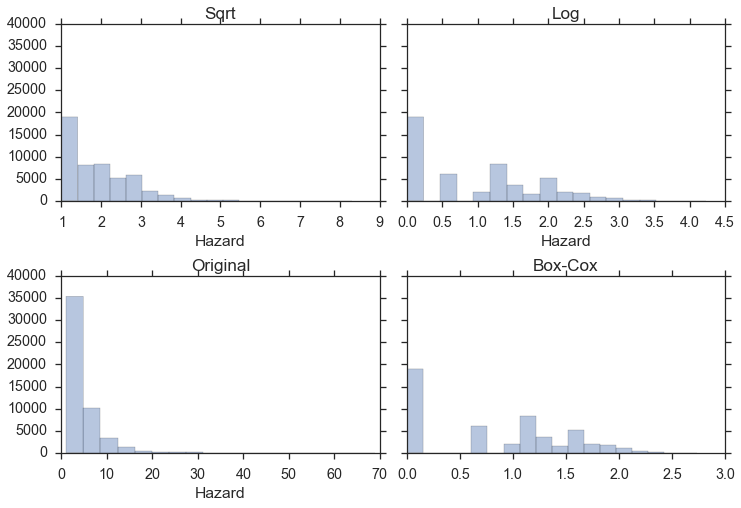

In [40]:
from scipy.stats import boxcox
print(target.unique())

fix, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
bins = 18
target_sqrt = np.sqrt(target)
sns.distplot(target_sqrt, ax=ax1, kde=False, bins=bins)
ax1.set_title('Sqrt')
target_log = np.log(target)
sns.distplot(target_log, ax=ax2, 
             kde=False, bins=bins)
ax2.set_title('Log')
# target_sqrt = np.sqrt(target)
sns.distplot(target, ax=ax3,
             kde=False, bins=bins)
ax3.set_title('Original')
box_cox = boxcox(target)
# print(box_cox[0].shape)
sns.distplot(box_cox[0], ax=ax4, kde=False, bins=bins)
ax4.set_title('Box-Cox')
plt.tight_layout()

In [41]:
np.mean(target), np.std(target), np.mean(np.log(target)), np.std(np.log(target))

(4.0227847604855, 4.0211540968190258, 0.98366104865442827, 0.89709753261243419)

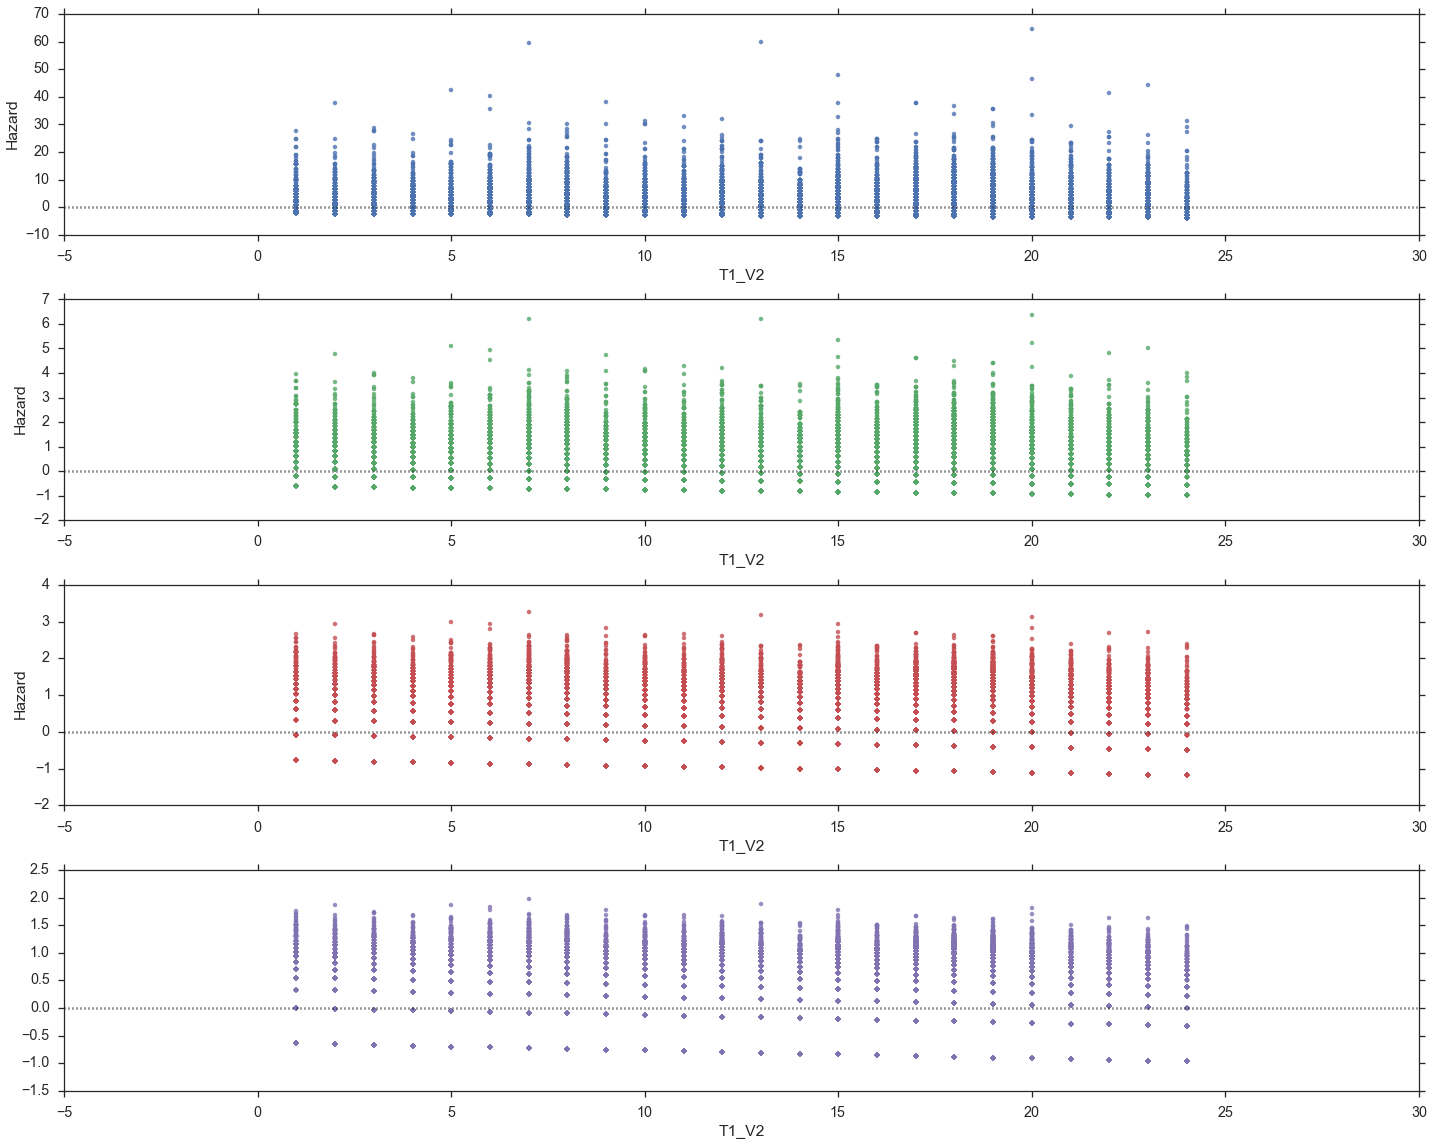

In [42]:
from sklearn.linear_model import Ridge

# dataset_train = union.fit_transform(dataset_train)
X_train = dataset_train['T1_V2']
y_train = target

from scipy.stats import boxcox
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 16))
sns.residplot(X_train, y_train, ax=ax1)
sns.residplot(X_train, np.sqrt(y_train), ax=ax2)
sns.residplot(X_train, np.log(y_train), ax=ax3)
sns.residplot(X_train, boxcox(y_train)[0], ax=ax4)
plt.tight_layout()

In [ ]:
# from src.main import get_feature_union
# from src.test import CustomPolynomials

# union = FeatureUnion([
#         feature_sets.POLYNOMIALS_SCALED
# #         ('pols', Polnclude_bias=False))
#     ])
# data_poly = union.fit_transform(dataset_train)
# # np.corrcoef([dataset_train['T1_V17'], dataset_train['T2_V12']], target)

# features = cols
# data_cols = [dataset_train[f] for f in features]
# response_corr = np.corrcoef(data_cols, target)[-1, :][:-1]

# fig, ax = plt.subplots(figsize=(22, 10))
# sns.barplot(response_corr, features, ax=ax, orient='h')

# # ax.set_xticklabels(features, rotation=-30)
# ax.yaxis.grid(True)
# # sns.set_style('whitegrid')
# sns.set_style('ticks')
# sns.despine()

(50999, 528)
528


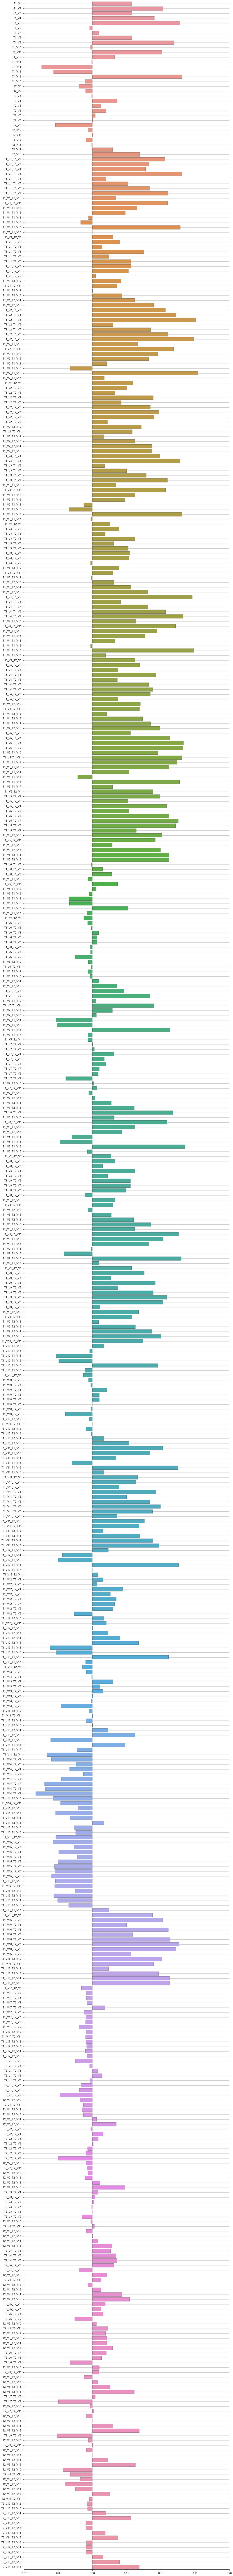

In [58]:
from src.main import get_feature_union
from src.test import CustomPolynomials

union = FeatureUnion([
        feature_sets.POLYNOMIALS_INTERACTIONS
#         ('pols', Polnclude_bias=False))
    ])
print
data_poly = union.fit_transform(dataset_train)
# data_poly = data_poly[:, :]
print(data_poly.shape)

cols_poly = CustomPolynomials(include_bias=False, interaction_only=True).fit_transform(list(dataset_train.columns)).flatten()
print(len(cols_poly))

# df = pd.DataFrame(data=data_poly, columns=cols_poly)
# df.drop(dataset_train.columns, inplace=True, axis=1)

features = cols_poly
data_cols = [data_poly[:, f] for f in range(len(cols_poly))]
response_corr = np.corrcoef(data_cols, target)[-1, :][:-1]

fig, ax = plt.subplots(figsize=(20, 250))
sns.barplot(response_corr, cols_poly, ax=ax, orient='h')

# ax.set_xticklabels(features, rotation=-30)
ax.yaxis.grid(True)
# sns.set_style('whitegrid')
sns.set_style('ticks')
sns.despine()